##  NetflixData:Cleaning,Analysis,andVisualization

-  This project involves loading,cleaning,analyzing,and visualizing data from a Netflix dataset.
- We'll use Python libraries like Pandas,Matplotlib, and Seaborn to work through the project.
- The goal is to explore the dataset,derive insights,and prepare for potential machine learning tasks.

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("netflix.csv")

# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 3. Data Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
# Convert the  'date_added' column to datetime column
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [10]:
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries


### 4. Exploratory Data Analysis (EDA)

In [11]:
# Count the number of Movies and TV Shows
type_counts = df['type'].value_counts()
type_counts

Movie      6126
TV Show    2664
Name: type, dtype: int64

#### 4.1 Content Type Distribution (Movies vs. TV Shows)

Text(0.5, 0.98, 'Total Content on Netflix')

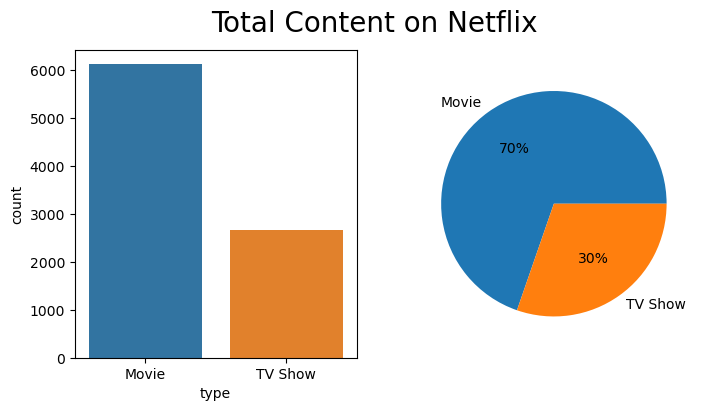

In [12]:
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(type_counts, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [13]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

#### 4.2 Rating Frequency (Movies vs. TV Shows)

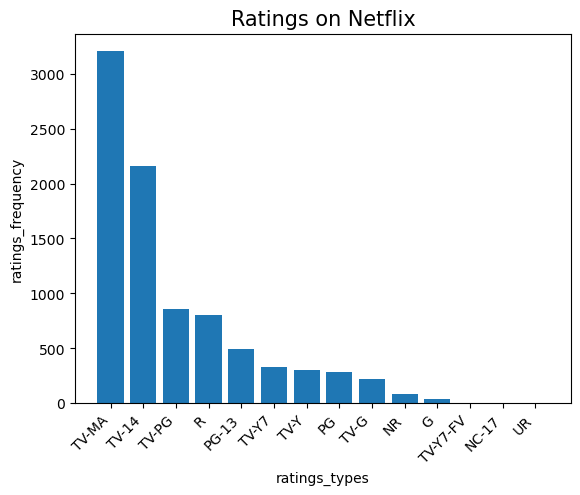

In [14]:
rating = df['rating'].value_counts().reset_index().sort_values(by='rating',ascending= False)
plt.bar(rating['index'],rating['rating'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("ratings_types")
plt.ylabel("ratings_frequency")
plt.title("Ratings on Netflix",fontsize=15)
plt.show()

Text(0.5, 0.98, 'Rating on Netflix')

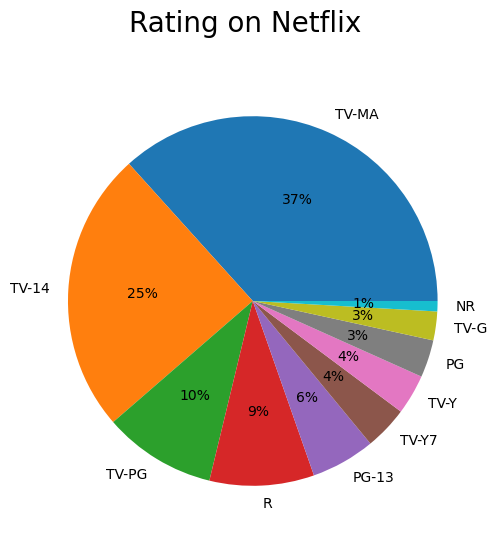

In [15]:
fig = plt.figure(figsize=(6,6)) 
plt.pie(rating['rating'][:10], labels=rating['index'][:10], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

#### 4.3 Top 10 Countries with Most Content

In [16]:
top_ten_countries = df['country'].value_counts().reset_index().sort_values(by='country',ascending=False)[:10]
top_ten_countries

,index,country
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


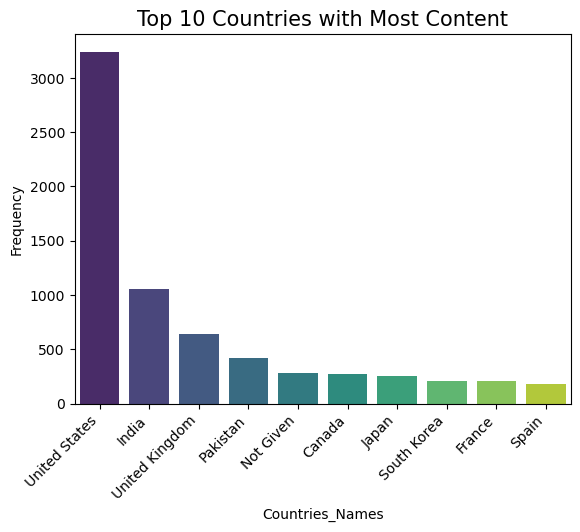

In [17]:
sns.barplot(x='index',y='country',data=top_ten_countries,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title("Top 10 Countries with Most Content",fontsize=15)
plt.xlabel("Countries_Names")
plt.ylabel("Frequency")
plt.show()

#### 4.4 Top 15 Directors with the Most Titles

In [18]:
top_15_directors = df['director'].value_counts().reset_index().sort_values(by='director',ascending=False)[1:15]
top_15_directors

,index,director
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
9,Youssef Chahine,12
10,Jay Chapman,12
8,Martin Scorsese,12


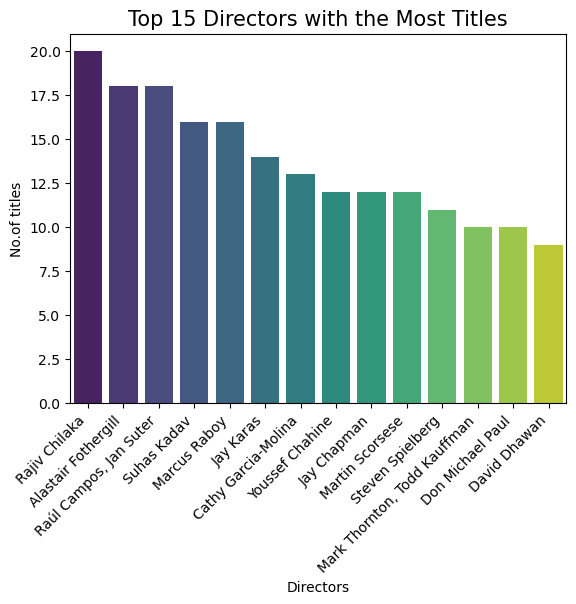

In [19]:
sns.barplot(x='index',y='director',data = top_15_directors,palette='viridis')
plt.title("Top 15 Directors with the Most Titles",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Directors")
plt.ylabel("No.of titles")
plt.show()

#### 4.5 Top 10 Popular Movie Genres

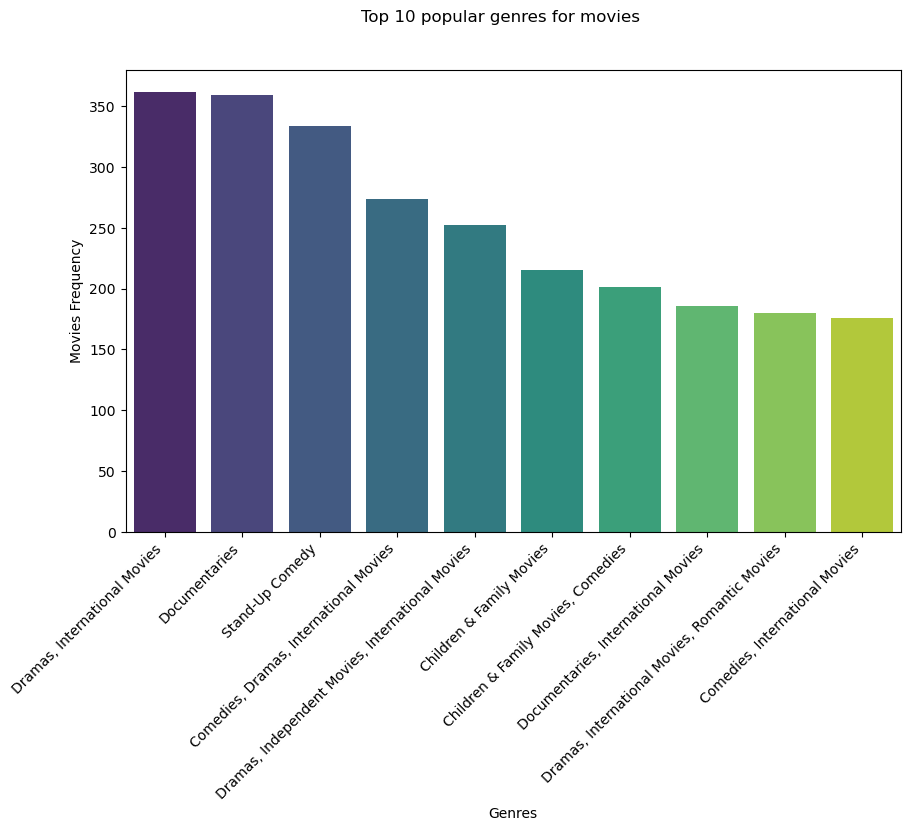

In [20]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies")
plt.show()

#### 4.6 Top 10 Popular Series Genres

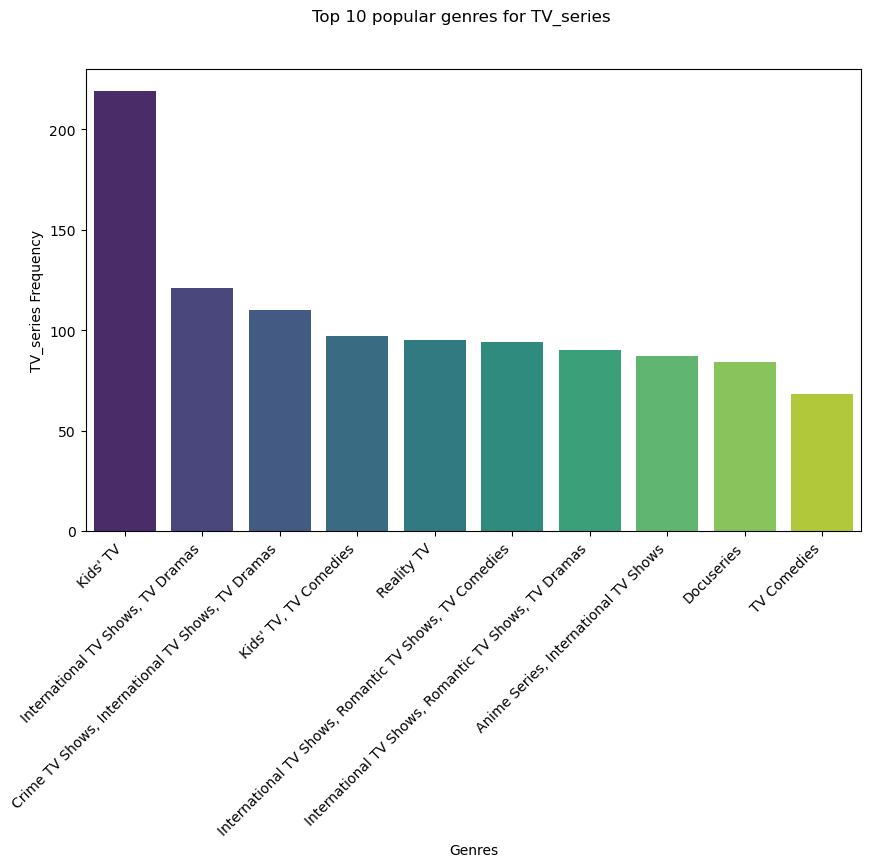

In [21]:
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV_series Frequency")
plt.suptitle("Top 10 popular genres for TV_series")
plt.show()

#### 4.7 Convert movie  and series duration to integer

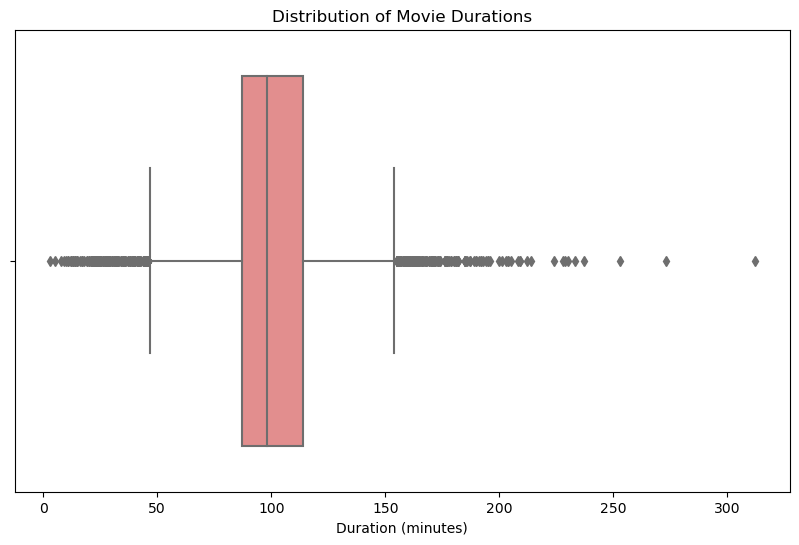

In [22]:
movies_df = df[df['type']=='Movie']
movies_df['duration'] = movies_df['duration'].str.replace('min','').astype(int)
# Plot movie duration distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=movies_df['duration'], color='lightcoral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

#### 4.8 Monthly releases of Movies and TV shows on Netflix

In [23]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

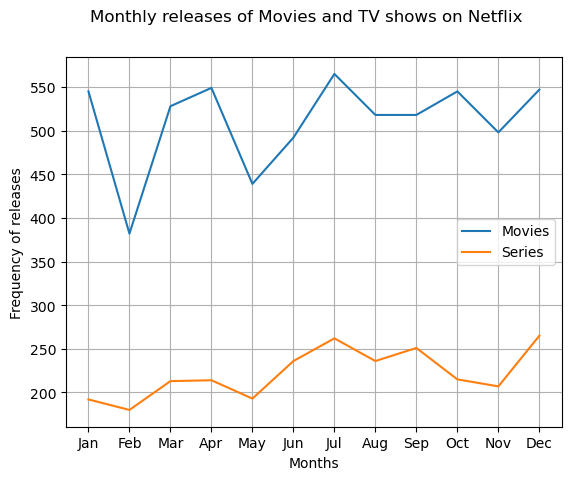

In [24]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

#### 4.8 Yearly releases of Movies and TV shows on Netflix

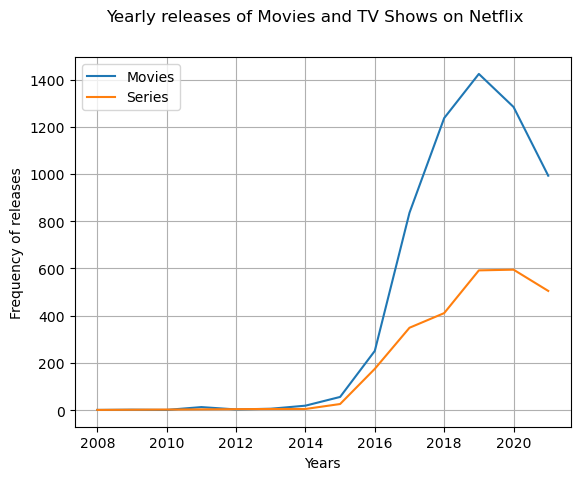

In [25]:
yearly_movie_release = df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_release = df[df['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies')
plt.plot(yearly_series_release.index, yearly_series_release.values,label='Series')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

#### 4.9 Word Cloud of Movie Titles

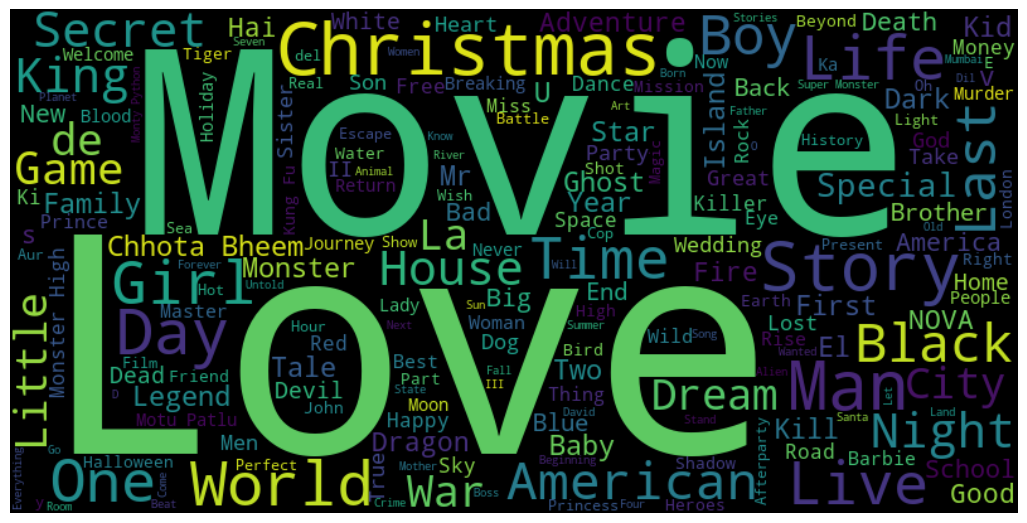

In [26]:
# Create a word cloud for movie titles
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()